In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
data = pd.read_csv('D:\\vgsales.csv')

In [4]:
data


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [15]:
data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [5]:
data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [6]:
data.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [10]:
data.fillna(0, inplace=True)


In [12]:
data.shape

(16598, 11)

In [14]:
#Calculate the total global sales for each gaming platform
platform_sales = data.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
print(platform_sales)

Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
PS       730.66
GBA      318.50
PSP      296.28
PS4      278.10
PC       258.82
XB       258.26
GB       255.45
NES      251.07
3DS      247.46
N64      218.88
SNES     200.05
GC       199.36
XOne     141.06
2600      97.08
WiiU      81.86
PSV       61.93
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64


In [20]:
# Group by year and sum the global sales
yearly_sales = data.groupby('Year')['Global_Sales'].sum()

# Convert the index and values to NumPy arrays
years = yearly_sales.index.to_numpy()
sales = yearly_sales.values

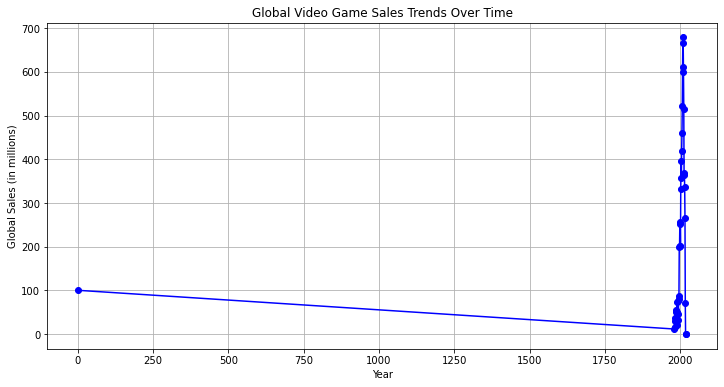

In [21]:
# Plotting the sales trends over time
plt.figure(figsize=(12, 6))
plt.plot(years, sales, marker='o', linestyle='-', color='b')
plt.title('Global Video Game Sales Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.grid(True)
plt.show()

In [24]:
 #Identify the top-selling games globally
top_selling_games = data[['Name', 'Global_Sales']].sort_values(by='Global_Sales', ascending=False).head(10)
print("Top Selling Games:")
print(top_selling_games)

Top Selling Games:
                        Name  Global_Sales
0                 Wii Sports         82.74
1          Super Mario Bros.         40.24
2             Mario Kart Wii         35.82
3          Wii Sports Resort         33.00
4   Pokemon Red/Pokemon Blue         31.37
5                     Tetris         30.26
6      New Super Mario Bros.         30.01
7                   Wii Play         29.02
8  New Super Mario Bros. Wii         28.62
9                  Duck Hunt         28.31


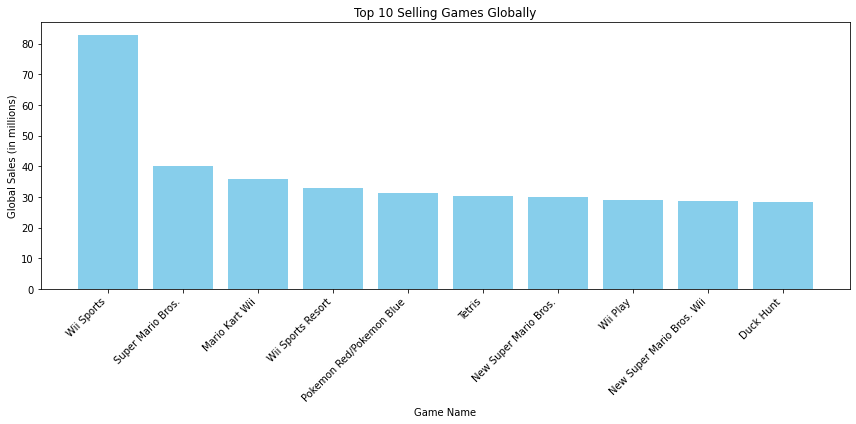

In [25]:
plt.figure(figsize=(12, 6))
plt.bar(top_selling_games['Name'], top_selling_games['Global_Sales'], color='skyblue')
plt.title('Top 10 Selling Games Globally')
plt.xlabel('Game Name')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Genre Analysis

In [27]:
genre_sales = data.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

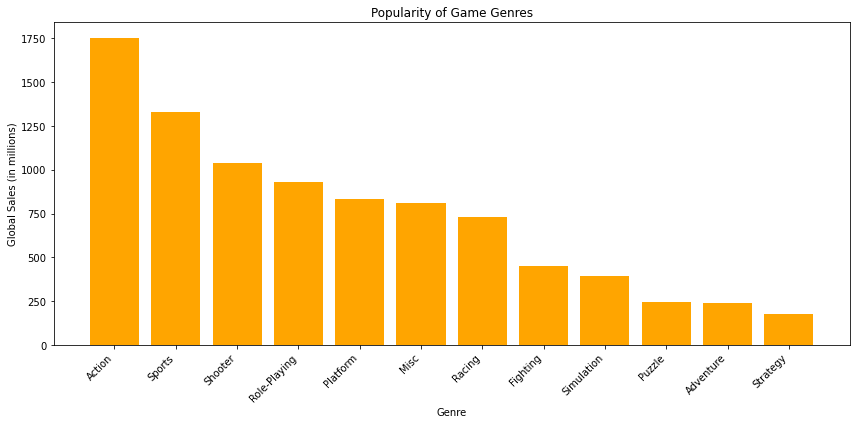

In [28]:
# Plotting a bar graph for genre popularity
plt.figure(figsize=(12, 6))
plt.bar(genre_sales.index, genre_sales.values, color='orange')
plt.title('Popularity of Game Genres')
plt.xlabel('Genre')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

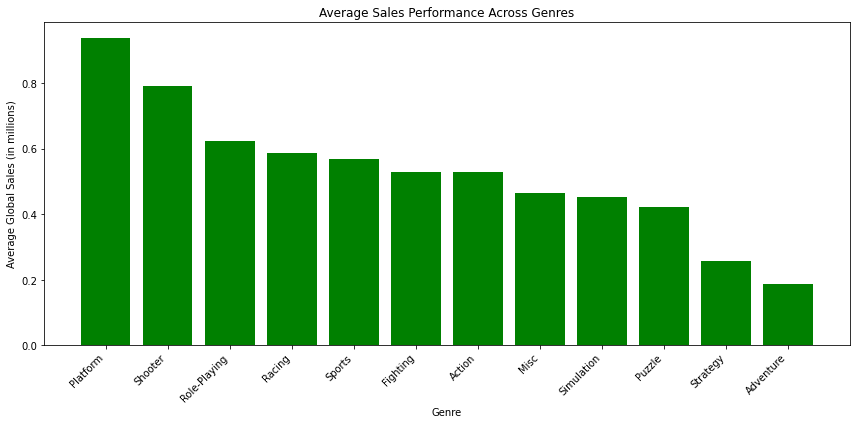

In [29]:
#Comparing sales performance across genres.
average_genre_sales = data.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False)

# Plotting a bar graph for sales performance across genres
plt.figure(figsize=(12, 6))
plt.bar(average_genre_sales.index, average_genre_sales.values, color='green')
plt.title('Average Sales Performance Across Genres')
plt.xlabel('Genre')
plt.ylabel('Average Global Sales (in millions)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

regional analysis

In [31]:
# Calculate the total sales for each region
region_sales = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

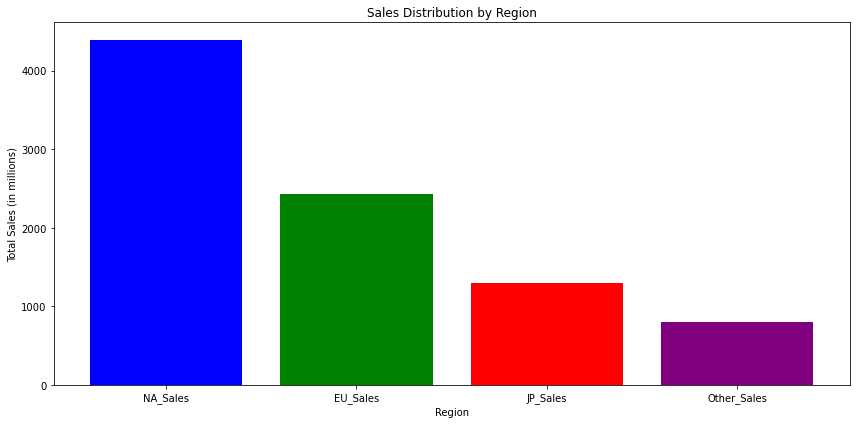

In [32]:
plt.figure(figsize=(12, 6))
plt.bar(region_sales.index, region_sales.values, color=['blue', 'green', 'red', 'purple'])
plt.title('Sales Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (in millions)')
plt.tight_layout()
plt.show()

In [34]:
platform_region_sales = data.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()


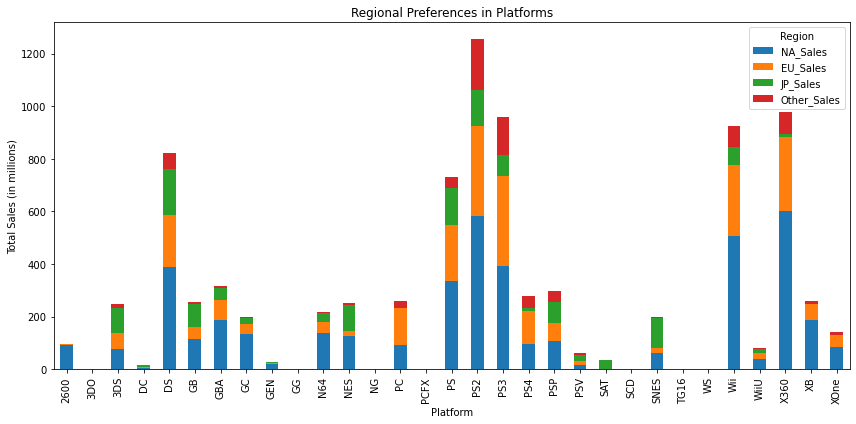

In [35]:
# Plotting a stacked bar graph for regional preferences in platforms
platform_region_sales.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Regional Preferences in Platforms')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.legend(loc='upper right', title='Region')
plt.tight_layout()
plt.show()

Correlation Analysis

In [44]:
data.columns


Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [47]:
correlation_columns = ['Rank', 'Global_Sales']

In [49]:
# Create a subset DataFrame with the selected columns
correlation_data = data[correlation_columns]

In [50]:
correlation_data

,Rank,Global_Sales
0,1,82.74
1,2,40.24
2,3,35.82
3,4,33.00
4,5,31.37
...,...,...
16593,16596,0.01
16594,16597,0.01
16595,16598,0.01
16596,16599,0.01


In [51]:
correlation_coefficient = correlation_data.corr().iloc[0, 1]


In [52]:
correlation_coefficient

-0.4274066079886847

In [54]:
scatter_columns = ['Rank', 'Global_Sales']

In [55]:
# Create a subset DataFrame with the selected columns
scatter_data = data[scatter_columns]


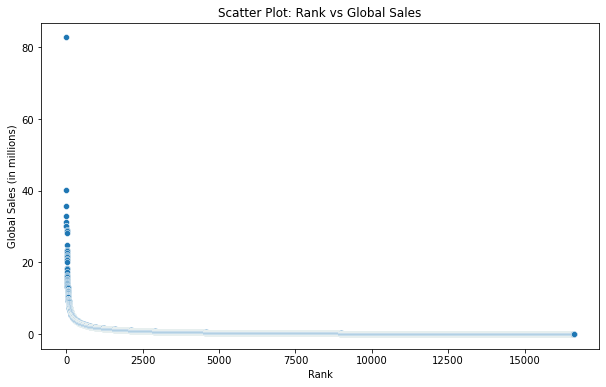

In [56]:
# Plotting a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rank', y='Global_Sales', data=scatter_data)
plt.title('Scatter Plot: Rank vs Global Sales')
plt.xlabel('Rank')
plt.ylabel('Global Sales (in millions)')
plt.show()

In [64]:
year_sales_columns = ['Year', 'Global_Sales']


In [65]:
# Create a subset DataFrame with the selected columns
year_sales_data = data[year_sales_columns]


In [71]:
year_sales_data 

,Year,Global_Sales
0,2006.0,82.74
1,1985.0,40.24
2,2008.0,35.82
3,2009.0,33.00
4,1996.0,31.37
...,...,...
16593,2002.0,0.01
16594,2003.0,0.01
16595,2008.0,0.01
16596,2010.0,0.01


In [72]:
yearly_sales = year_sales_data.groupby('Year')['Global_Sales'].sum()


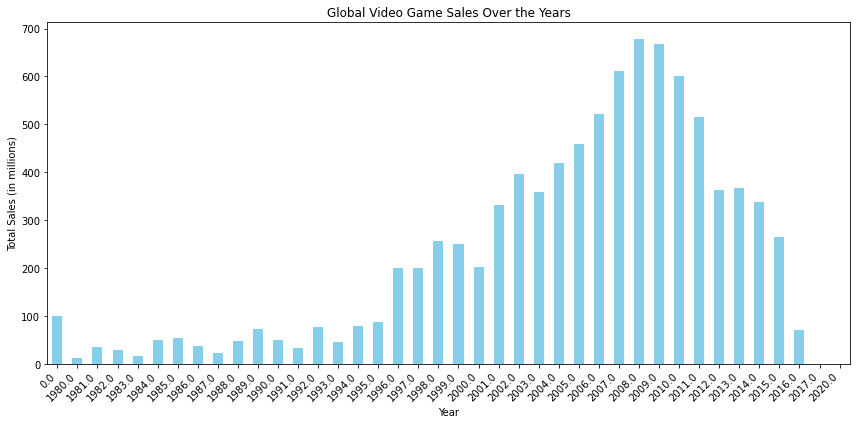

In [73]:
# Plotting a bar graph for yearly sales
plt.figure(figsize=(12, 6))
yearly_sales.plot(kind='bar', color='skyblue')
plt.title('Global Video Game Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

In [79]:
data.columns


Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')